<a href="https://colab.research.google.com/github/Mar1ry/AI-week-4/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataFrame columns after loading:
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
------------------------------
Dropped 'id' column.
Median 'radius_mean' calculated: 13.37

Priority classes and their encoded values: ['High', 'Low', 'Medium']

Features (X) shape: (569, 30)
Target (y) shape: (569,)

First 5 rows of features:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean 

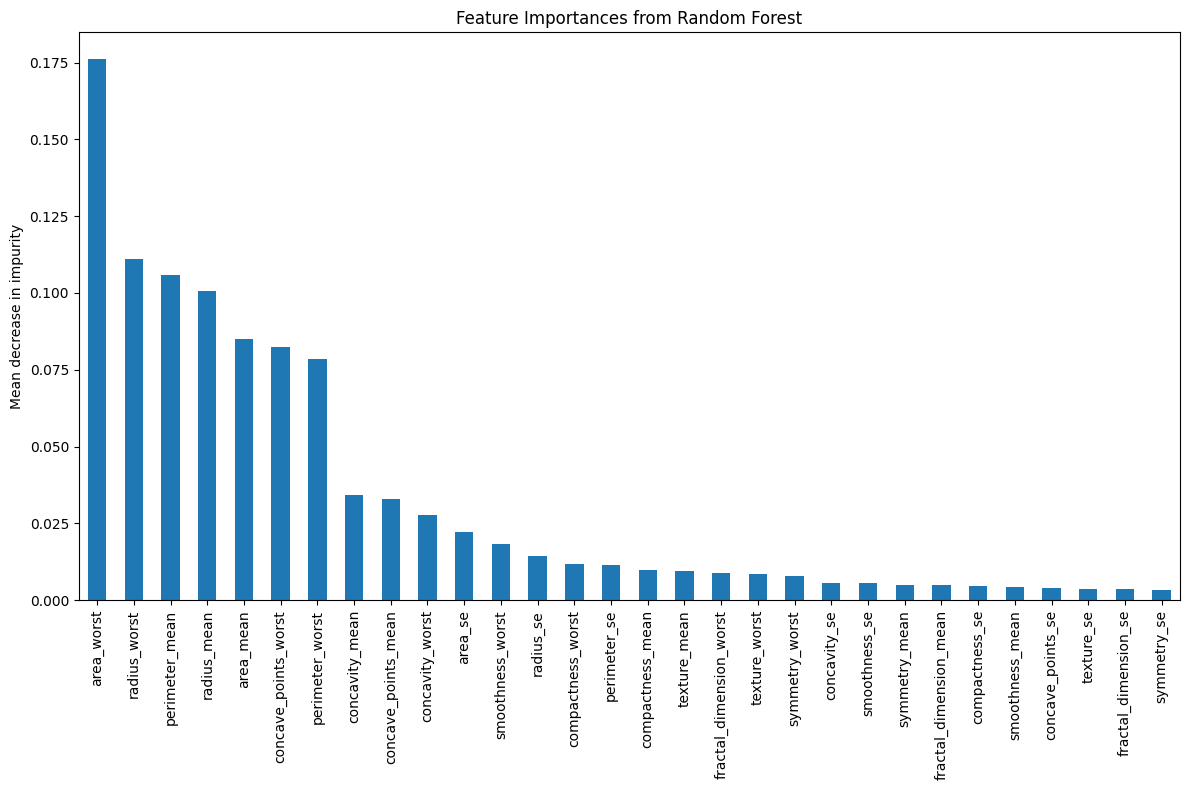


Generating Confusion Matrix Plot...


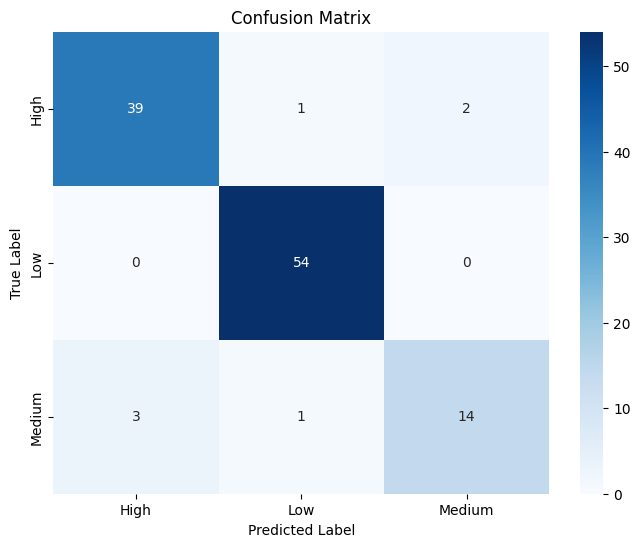


Task 3 completed. Performance metrics and visualizations are generated.


In [4]:
# Task 3: Predictive Analytics for Resource Allocation
# Dataset: Kaggle Breast Cancer Dataset (assuming data.csv or similar format)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer # To load directly if not using data.csv

# --- 1. Load the dataset ---

df = pd.read_csv('data.csv')

# Print column names to identify the correct 'mean radius' column name
print("DataFrame columns after loading:")
print(df.columns)
print("-" * 30)

# --- 2. Preprocess Data ---

# Drop the 'id' column if it exists (common in the Kaggle version of data.csv)
if 'id' in df.columns:
    df = df.drop('id', axis=1)
    print("Dropped 'id' column.")

# Drop the 'Unnamed: 32' column if it exists (often empty in data.csv from Kaggle)
if 'Unnamed: 32' in df.columns:
    df = df.drop('Unnamed: 32', axis=1)
    print("Dropped 'Unnamed: 32' column.")

# Ensure 'diagnosis' column exists, if not, it means it was loaded from sklearn and 'diagnosis_encoded' is present.
# If 'diagnosis' (text) is not present but 'diagnosis_encoded' (numeric) is, we'll create 'diagnosis'.
if 'diagnosis' not in df.columns and 'diagnosis_encoded' in df.columns:
    # This block handles the case where data was loaded from sklearn.datasets.load_breast_cancer
    # where 'target' (which we renamed to 'diagnosis_encoded') is 0 for benign, 1 for malignant.
    # We already created the 'diagnosis' column in the try-except block above if loading from sklearn.
    pass # Already handled when loading from sklearn

elif 'diagnosis' in df.columns:
    # If the dataset was loaded from data.csv, 'diagnosis' column (M/B) is usually present.
    # Encode the 'diagnosis' column (M=Malignant, B=Benign) to numerical values
    le = LabelEncoder()
    # Check if 'diagnosis_encoded' already exists (might if we ran this code before or loaded from sklearn)
    if 'diagnosis_encoded' not in df.columns:
        df['diagnosis_encoded'] = le.fit_transform(df['diagnosis']) # M=1, B=0 by default for LabelEncoder

# --- Create 'issue_priority' based on 'diagnosis' and 'mean radius' ---
# This is a synthetic target variable as per the task requirements.
# High: Malignant
# Medium: Benign with 'mean_radius' above median
# Low: Benign with 'mean_radius' below median

# Calculate the median of 'mean radius' from the *entire* dataset for consistent splitting
# **FIX:** Replace 'mean radius' with the correct column name found from printing df.columns
# Assuming the correct name is 'radius_mean' based on common dataset formats, replace 'mean radius' below.
# If 'radius_mean' is also not correct, examine the printout of df.columns to find the right one.
try:
    median_radius = df['radius_mean'].median() # Changed from 'mean radius' to 'radius_mean'
    print(f"Median 'radius_mean' calculated: {median_radius}")
except KeyError:
    # Handle the case where 'radius_mean' is also not the correct name
    print("\nError: Neither 'mean radius' nor 'radius_mean' column found.")
    print("Please examine the DataFrame columns printed above and update the code with the correct column name for mean radius.")
    # You might want to exit or handle this error more gracefully depending on your needs
    raise # Re-raise the KeyError to stop execution

def assign_priority(row, median_radius_val):
    # **FIX:** Replace 'mean radius' with the correct column name here as well
    if row['diagnosis_encoded'] == 1: # Malignant
        return 'High'
    elif row['diagnosis_encoded'] == 0 and row['radius_mean'] > median_radius_val: # Changed from 'mean radius' to 'radius_mean'
        return 'Medium'
    else: # Benign and smaller tumor
        return 'Low'

df['issue_priority'] = df.apply(lambda row: assign_priority(row, median_radius), axis=1)

# Encode the new 'issue_priority' target variable
priority_encoder = LabelEncoder()
df['issue_priority_encoded'] = priority_encoder.fit_transform(df['issue_priority'])
# It's crucial to know the mapping:
print(f"\nPriority classes and their encoded values: {list(priority_encoder.classes_)}")
# E.g., ['High', 'Low', 'Medium'] -> High=0, Low=1, Medium=2

# Define features (X) and target (y)
# Drop the original 'diagnosis' and 'issue_priority' text columns, and the intermediate encoded ones from the features.
columns_to_drop = ['diagnosis', 'diagnosis_encoded', 'issue_priority', 'issue_priority_encoded']
# Filter out columns that don't exist in the dataframe (e.g., 'diagnosis' might not exist if loaded from sklearn)
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

X = df.drop(existing_columns_to_drop, axis=1)
y = df['issue_priority_encoded']

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print("\nFirst 5 rows of features:")
print(X.head())
print("\nFirst 5 rows of target:")
print(y.head())

# Split data into training and testing sets
# Use stratify=y to ensure that the proportions of each priority class are the same in both training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

# --- 3. Train a Model (Random Forest Classifier) ---

print("\nTraining Random Forest Classifier...")
# n_estimators: number of trees in the forest
# random_state: for reproducibility
# class_weight='balanced': important if classes are imbalanced to give more weight to minority classes
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
print("Model training complete.")

# --- 4. Evaluate using accuracy and F1-score ---

print("\nEvaluating model performance...")
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
# 'weighted' average is suitable for multi-class classification where classes might be imbalanced.
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"F1-Score (Weighted): {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
# Use target_names to map encoded labels back to meaningful names (High, Low, Medium)
print(classification_report(y_test, y_pred, target_names=priority_encoder.classes_))


# --- Optional: Feature Importance Visualization ---
print("\nGenerating Feature Importance Plot...")
importances = model.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(12, 8))
forest_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Feature Importances from Random Forest")
ax.set_ylabel("Mean decrease in impurity")
plt.tight_layout()
plt.show()

# --- Optional: Confusion Matrix ---
print("\nGenerating Confusion Matrix Plot...")
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=priority_encoder.classes_, yticklabels=priority_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\nTask 3 completed. Performance metrics and visualizations are generated.")